# <center>Assignment 5: Fraud Detection by Autoencoder </center>

In this assignment, you'll apply autencoders to detect credit card frauds. This is an unsupervised approach to anomaly detection. Typically most credit card transactions are normal and frauds are rare events. It is easy to obtain normal transactions, but it can be difficult to collect sufficient frauds such that a supervised model can be trained.

The basic idea is that we <b>train an autoencoder model using only normal samples. Fed with a new transaction, if the model cannot succesfully reconstruct it and leads to a large reconstruction error, an alarm can be raised to signify that this transaction is "off the chart"</b>.

In this assignment, we'll use a dataset of credit card transactions. The training dataset (creditcard_train.csv) contains all normal samples (i.e. target class is all negiative), while the test dataset (creditcard_test.csv) contains mixed positive and negative samples for you to evaluate the model performance only. The class label can be found in the column named "Class" inthe test dataset. 

Note, for this dataset, it is not guaranteed that autoencoders can deliver the best performance. We just use the dataset to practice autoencoder models.

A snapshot of the data is also shown below.

In [173]:
# import package
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import Image


In [2]:
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(231)

D:\ProgramData\Anaconda3\envs\03_ten1131_keras231\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\envs\03_ten1131_keras231\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\envs\03_ten1131_keras231\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\envs\0

In [27]:
seed

<function RandomState.seed>

In [277]:
data = pd.read_csv('03_data/26_creditcard_train.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [118]:
#we can find that data have huge diversity, we will regulaized in train process
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,274315.000000,274315.000000,274315.000000,274315.000000,274315.000000,274315.000000,274315.000000,274315.000000,274315.000000,274315.000000,...,274315.000000,274315.000000,274315.000000,274315.000000,274315.000000,274315.000000,274315.000000,274315.000000,274315.000000,274315.000000
mean,0.008786,-0.006924,0.012570,-0.007023,0.005351,0.002545,0.009636,-0.001170,0.004125,0.009462,...,-0.000421,-0.001420,0.000437,0.000303,-0.000059,-0.000122,0.000044,-0.000233,-0.000087,88.397732
std,1.927094,1.632766,1.458575,1.399065,1.358072,1.331085,1.182005,1.163336,1.089334,1.044489,...,0.766901,0.716774,0.723919,0.623966,0.605868,0.520940,0.482274,0.399742,0.329933,248.658604
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,...,-54.497720,-34.830382,-9.499423,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.917711,-0.600471,-0.884807,-0.850070,-0.690156,-0.766580,-0.551509,-0.208614,-0.640380,-0.533356,...,-0.211701,-0.228551,-0.542470,-0.161729,-0.354697,-0.317068,-0.326990,-0.070802,-0.052896,5.640000
50%,0.020566,0.063889,0.182131,-0.021658,-0.053565,-0.272957,0.041417,0.022095,-0.050316,-0.092110,...,-0.062617,-0.029704,0.007267,-0.011096,0.041045,0.016532,-0.052170,0.001270,0.011244,22.000000
75%,1.316506,0.799423,1.028648,0.738800,0.611673,0.399949,0.571105,0.325921,0.597599,0.455548,...,0.132714,0.185726,0.528727,0.147649,0.439421,0.350501,0.241073,0.090687,0.078032,77.190000
max,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,...,38.117209,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


- According to analysis of our data, we find transaction part data is very different from <code>['Amount']</code> column part data
- For instance, most part of transaction value are aroud 0 and in the range of <code>[-100,100]</code>, actually, 75% in the range of <code>[-1,1]</code>. So for these data maybe L1 regualtion is better
- But for the <code>['Amount']</code> value the standard deviation is 100, maybe we should use L2 regulation to pay attention to outlizer
- We have two type of nomalized goal, one for <code>[-1,1]+tanh</code> another for <code>[0,1]+sigmoid</code>

In [7]:
print(data.shape)

(274315, 29)


In [333]:
test = pd.read_csv('03_data/27_creditcard_test.csv')
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [9]:
print(test.shape)

(10492, 30)


In [201]:
#0=normal, 1=frauds
test.groupby(['Class']).count()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [ ]:
"""
fig1, ax1 = plt.subplots()
ax1.pie(test.groupby(['Class']), autopct='%1.1f%%',
        shadow=True, startangle=90)
"""

### Task 1: Data preprocess

1. `Sample normalization`: Notice that columns (e.g. Amount column) in the datasets are in different scales . For autoencoder, since the loss is the reconstruction error, it's always necessary to normalize the data to avoid computation overflow of the error (i.e. approaching infinite). For example, variables can be normalized to a range between [0,1] through min_max normalization so that sigmoid activation can be used at the end and loss can be controled within a range. 
2. Split the traininng dataset into train and validation subsets so that you can use the validation dataset to control the train progress.
3. (optional) You can establish a baseline model using traditional approach, for example, KNN, T-SNE etc.

In [64]:
# preprocess data

# Add your code here
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

In [282]:
#We have two way to control range between [0,1]. First is MinMaxScaler, Second is QuantileTransformer
def normal_model(data, scaler):
    """
    MM = MinMaxScaler
    QT = QuantileTransformer
    """
    data = data
    scaler = scaler
    col_name = data.columns

    if scaler == 'MM':
        scaler = MinMaxScaler()
    elif scaler == 'QT':
        scaler = QuantileTransformer(output_distribution='uniform')
    elif scaler == 'SS':
        scaler = StandardScaler().reshap(-1,1)
    else:
        print("Plz choose regulizor")
    data_train = pd.DataFrame(scaler.fit_transform(data.values), columns=col_name)
    #data_train = scaler.fit_transform(data.values)
    
    return data_train


In [124]:
#test Part
"""
data.columns

col_name = df_1.columns

scalar = MinMaxScaler()
df_2 =scalar.fit_transform(df_1.values)

df_2 = pd.DataFrame(df_2, columns=col_name)

df_2

df_1 = data.copy()

df_2 = pd.DataFrame(normalize(df_1, norm='l2'))

df_2

normalized_Amount = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

data['Amount'] = normalized_Amount
print(data[['Amount']])

#try to find out how to directly use seed(123) or set_random_seed(123)
x_train, x_validation = train_test_split(data, test_size=0.2, random_state =123 )
"""

"\ndata.columns\n\ncol_name = df_1.columns\n\nscalar = MinMaxScaler()\ndf_2 =scalar.fit_transform(df_1.values)\n\ndf_2 = pd.DataFrame(df_2, columns=col_name)\n\ndf_2\n\ndf_1 = data.copy()\n\ndf_2 = pd.DataFrame(normalize(df_1, norm='l2'))\n\ndf_2\n\nnormalized_Amount = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))\n\ndata['Amount'] = normalized_Amount\nprint(data[['Amount']])\n\n#try to find out how to directly use seed(123) or set_random_seed(123)\nx_train, x_validation = train_test_split(data, test_size=0.2, random_state =123 )\n"

### Task 2: Anomaly detection by deep autoencoder

**Requirements**:
1. First, create a `deep autoencoder` as follows:
    - Create a deep encoder with at least 2 hidden layers in both encoder and decoder. 
    - For visualization, set the dimension of the bottleneck layer to 2 or 3
    - Train the autoencoder using the train/validation subsets
2. After training, reconstruct samples in the test dataset and calculate the `reconstruction error`.
3. Plot the histogram of the reconstruction errors of positive/negative classes in the test dataset
4. Choose an appropriate `threshold` and predict a sample is positive if its `construction error is greater than this threshold`.
5. Calculate precision, recall, f1, and ROC AUC score after you determine the threshold
6. Extract the `latent variables` in the bottleneck layer for the test samples, plot these variables in a scatter plot, and use different colors to differenitate samples in different classes.
7. Analysis:
    - Describe how you choose the hyperparameters, e.g. dimension of each layer, activation function, loss function etc.
    - Discuss whether you are able to differentiate samples from these two classes by reconstruction errors. What is the appropriate threshold?
    - From the scatter plot, do you think samples in both classes can be cleanly separated in the latent space?

Feel free to use the code in our lab material.

In [285]:
# Define deep autoencoder model

# Add your code here
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model

def auto_model_1(input_dim, dim_list):
    
    
   
    
    input_layer1 = Input(shape=(input_dim,))
    #
    #encode_layer2 = Dense(dim_list[0], activation='sigmoid', activity_regularizer=regularizers.l2(0.01))(input_layer1)
    encode_layer2 = Dense(dim_list[0], activation='sigmoid')(input_layer1)
    encode_layer3 = Dense(dim_list[1], activation='sigmoid')(encode_layer2)
    bottleneck_layer4 = Dense(dim_list[2], activation='sigmoid')(encode_layer3)
    decode_layer5 = Dense(dim_list[1], activation='sigmoid')(bottleneck_layer4)
    decode_layer6 = Dense(dim_list[0], activation='sigmoid')(decode_layer5)
    decode_layer7 = Dense(input_dim, activation='sigmoid')(decode_layer6)
    model = Model(inputs = input_layer1, outputs = decode_layer7)
    print(model.summary())
    
    return model


In [248]:
def auto_model_2(input_dim, dim_list):
    
    
   
    
    input_layer1 = Input(shape=(input_dim,))
    #
    #encode_layer2 = Dense(dim_list[0], activation='sigmoid', activity_regularizer=regularizers.l2(0.01))(input_layer1)
    encode_layer2 = Dense(dim_list[0], activation='sigmoid')(input_layer1)
    encode_layer3 = Dense(dim_list[1], activation='relu')(encode_layer2)
    bottleneck_layer4 = Dense(dim_list[2], activation='sigmoid')(encode_layer3)
    decode_layer5 = Dense(dim_list[1], activation='relu')(bottleneck_layer4)
    decode_layer6 = Dense(dim_list[0], activation='sigmoid')(decode_layer5)
    decode_layer7 = Dense(input_dim, activation='sigmoid')(decode_layer6)
    model = Model(inputs = input_layer1, outputs = decode_layer7)
    print(model.summary())
    
    return model


In [98]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274310,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
274311,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
274312,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
274313,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


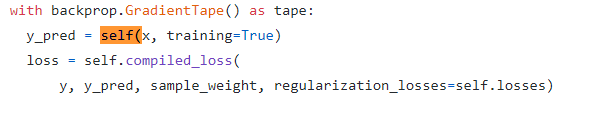

In [176]:
#contain in https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/keras/engine/training.py
Image(filename='04_Images/21_y_pred.png')

In [286]:
# Compile and train model
from keras.callbacks.callbacks import ModelCheckpoint
from keras.callbacks.tensorboard_v1 import TensorBoard
# Add your code here

#model1 is standard every columns before input
if __name__=="__main__":
    
    data = pd.read_csv('03_data/26_creditcard_train.csv')
    #data.head()
    #initial some hyperparameter, you can change it before bulild  a model
    #input dimention is determined by columns numbers of out input dataset
    input_dim = x_train.shape[1]
    #We assume our encode and decode have 2 layers and we want our bottleneck layer can visilazed with 2-dim vector
    dim_list = [14, 6, 2]
    nb_epoch = 10
    batch_size = 32
    
    #normalization model
    data = normal_model(data,scaler='QT')
    #data['Amount'] = MinMaxScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
    #test['Amount'] = MinMaxScaler().fit_transform(test['Amount'].values.reshape(-1, 1))
                                                    
    x_train, x_validation = train_test_split(data, test_size=0.2, random_state =123 )
    
    
    model_1 = auto_model_1(input_dim, dim_list)
    #we use mse to caculate (y_true - y_pred). In autoencoder, y_true=(y_train)=x_train(in autoencode situation), y_pred=x_train
    model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
    #we use checkpoint to save our model as 'model_1.h5'
    checkpointer = ModelCheckpoint(filepath="model_1.h5",
                               verbose=0,
                               save_best_only=True)
    
    tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
    
    #autoencoder is very different from other neural network, the target y_train is himself,
    #which means we need to find the most close result compare with orignial result
    history_1 = model_1.fit(x_train, x_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(x_validation, x_validation),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history
    


Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 29)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 14)                420       
_________________________________________________________________
dense_82 (Dense)             (None, 6)                 90        
_________________________________________________________________
dense_83 (Dense)             (None, 2)                 14        
_________________________________________________________________
dense_84 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_85 (Dense)             (None, 14)                98        
_________________________________________________________________
dense_86 (Dense)             (None, 29)                435

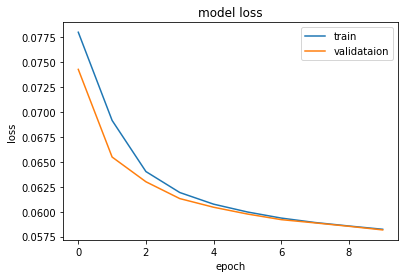

In [287]:
plt.plot(history_1['loss'])
plt.plot(history_1['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validataion'], loc='upper right');
plt.show()

In [249]:
#model2 is onky standard [amount] but add l1 regulation at first layer
data = pd.read_csv('03_data/26_creditcard_train.csv')
#data.head()
#initial some hyperparameter, you can change it before bulild  a model
#input dimention is determined by columns numbers of out input dataset
input_dim = x_train.shape[1]
#We assume our encode and decode have 2 layers and we want our bottleneck layer can visilazed with 2-dim vector
dim_list = [14, 6, 2]
nb_epoch = 10
batch_size = 32

#normalization model
data = normal_model(data,scaler='QT')
#data['Amount'] = MinMaxScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
#test['Amount'] = MinMaxScaler().fit_transform(test['Amount'].values.reshape(-1, 1))

x_train, x_validation = train_test_split(data, test_size=0.2, random_state =123 )


model_2 = auto_model_2(input_dim, dim_list)
#we use mse to caculate (y_true - y_pred). In autoencoder, y_true=(y_train)=x_train(in autoencode situation), y_pred=x_train
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#we use checkpoint to save our model as 'model_2.h5'
checkpointer = ModelCheckpoint(filepath="model_2.h5",
                           verbose=0,
                           save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',
                      histogram_freq=0,
                      write_graph=True,
                      write_images=True)

#autoencoder is very different from other neural network, the target y_train is himself,
#which means we need to find the most close result compare with orignial result
history_2 = model_2.fit(x_train, x_train,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_validation, x_validation),
                verbose=1,
                callbacks=[checkpointer, tensorboard]).history

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 29)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 14)                420       
_________________________________________________________________
dense_76 (Dense)             (None, 6)                 90        
_________________________________________________________________
dense_77 (Dense)             (None, 2)                 14        
_________________________________________________________________
dense_78 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_79 (Dense)             (None, 14)                98        
_________________________________________________________________
dense_80 (Dense)             (None, 29)                435

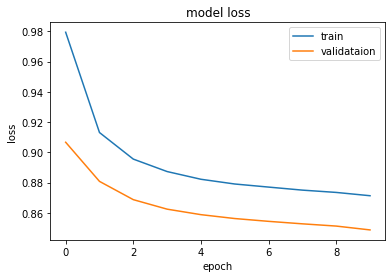

In [250]:
plt.plot(history_2['loss'])
plt.plot(history_2['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validataion'], loc='upper right');
plt.show()

In [301]:
# Predict samples in the test dataset and calculate reconstruction errors

# Add your code here
test = pd.read_csv('03_data/27_creditcard_test.csv')

#because this is unsupervised learning, we didn't use label when we traing
x_test = test.drop(['Class'],axis=1)
#in this data y_test is the ground truth, we can use our predict to built compart result
y_test = test['Class']

#for compare result, we should normilized x_test original data
x_test = normal_model(x_test,scaler='QT')
#test['Amount'] = MinMaxScaler().fit_transform(test['Amount'].values.reshape(-1, 1))

predictions = model_1.predict(x_test)
#the loss function of autocode is sqrt(x-xhat)
#xhat is the reconsturction result from NN model(output layer resutl), we should use it to deduct orignial x (input_layer)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

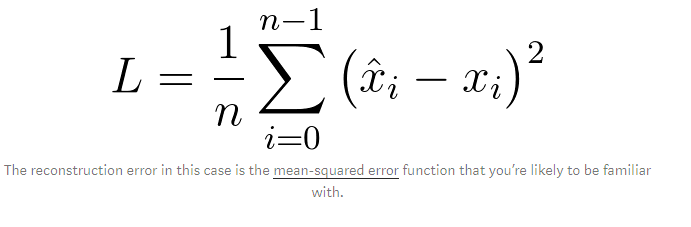

In [174]:
#according to our train_model, the training model only can identify class = 0 (without fraud) senario.
#So it will get worst resutl when we use 0/1 negative/positive real data. 
#perhaps, it we can get better variance when we provivd test[test['class']==1]
Image(filename='04_Images/19_autoencoder Loss.png')

In [302]:
#according to our train_model, the training model only can identify class = 0 (without fraud) senario.
#So it will get worst resutl when we use 0/1 negative/positive real data. 
#perhaps, it we can get better variance when we provivd test[test['class']==1]
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,10492.000000,10492.000000
mean,0.060254,0.046893
std,0.034532,0.211419
min,0.009318,0.000000
25%,0.035923,0.000000
50%,0.052468,0.000000
75%,0.074236,0.000000
max,0.244589,1.000000


In [290]:
error_df[error_df['true_class']==0].describe()

,reconstruction_error,true_class
count,10000.000000,10000.0
mean,0.083596,0.0
std,0.007068,0.0
min,0.042830,0.0
25%,0.077849,0.0
50%,0.084094,0.0
75%,0.089274,0.0
max,0.119640,0.0


In [291]:
error_df[error_df['true_class']==1].describe()

,reconstruction_error,true_class
count,492.000000,492.0
mean,0.074589,1.0
std,0.010116,0.0
min,0.049333,1.0
25%,0.067893,1.0
50%,0.072391,1.0
75%,0.079870,1.0
max,0.110169,1.0


In [162]:
df_5 =  pd.DataFrame(predictions)

In [163]:
df_5

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.957405,0.792612,0.834707,0.242840,0.766226,0.266638,0.209789,0.796461,0.284367,0.382889,...,0.587235,0.605245,0.474415,0.665611,0.491646,0.579759,0.533595,0.417201,0.313841,0.003361
1,0.957918,0.794029,0.836774,0.256356,0.766326,0.263296,0.208976,0.796407,0.283356,0.384949,...,0.587434,0.605091,0.473086,0.665971,0.370039,0.583516,0.488836,0.417239,0.313748,0.003355
2,0.958525,0.793531,0.837511,0.250040,0.767047,0.264229,0.208685,0.796858,0.283945,0.384820,...,0.587865,0.604813,0.474300,0.666169,0.441364,0.583150,0.385389,0.417437,0.313361,0.003342
3,0.958870,0.792640,0.837986,0.245450,0.767554,0.264699,0.207972,0.797504,0.284833,0.384353,...,0.588529,0.604367,0.474870,0.666427,0.481619,0.583011,0.343016,0.417511,0.312676,0.003313
4,0.957276,0.792005,0.837569,0.265597,0.766733,0.261799,0.205970,0.797705,0.284479,0.384835,...,0.588848,0.603185,0.471714,0.665721,0.233172,0.587041,0.597162,0.417565,0.311921,0.003309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,0.958179,0.794075,0.837191,0.255164,0.766469,0.263525,0.209067,0.796402,0.283420,0.385218,...,0.587452,0.605095,0.473595,0.666028,0.390557,0.583519,0.434304,0.417287,0.313785,0.003366
10488,0.957173,0.791753,0.834111,0.248314,0.765649,0.265221,0.209591,0.796514,0.285418,0.382566,...,0.587779,0.605062,0.472606,0.664922,0.422130,0.580127,0.587074,0.417380,0.313437,0.003382
10489,0.957314,0.792338,0.834494,0.246963,0.765928,0.265563,0.209660,0.796471,0.284788,0.382852,...,0.587516,0.605186,0.473278,0.665260,0.443179,0.580207,0.563496,0.417292,0.313653,0.003371
10490,0.958280,0.793976,0.837245,0.253308,0.766681,0.263803,0.208988,0.796528,0.283496,0.385068,...,0.587536,0.605038,0.473842,0.666076,0.409205,0.583341,0.421319,0.417337,0.313691,0.003356


In [151]:
history

{'val_loss': [0.001924183432593967,
  0.0019233518195186329,
  0.0017106082680264291,
  0.0016911986567515406,
  0.0015422056439702,
  0.0014783789453746185,
  0.001473880469648351,
  0.0014643556483316137,
  0.0014470271016309227,
  0.0014256884027389932],
 'val_accuracy': [0.990594744682312,
  0.990594744682312,
  0.990594744682312,
  0.990594744682312,
  0.990594744682312,
  0.990594744682312,
  0.990594744682312,
  0.990594744682312,
  0.990594744682312,
  0.990594744682312],
 'loss': [0.0023739096078947645,
  0.0019294364758224534,
  0.0018214427632816338,
  0.001706468952243084,
  0.0016707696441279599,
  0.0014972109896524571,
  0.0014839604612333572,
  0.001478335087271294,
  0.0014659216247683241,
  0.0014445215419357919],
 'accuracy': [0.97737545,
  0.99082714,
  0.99082714,
  0.99082714,
  0.99082714,
  0.99082714,
  0.99082714,
  0.99082714,
  0.99082714,
  0.99082714]}

In [236]:
"""
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)
"""

"\nfig = plt.figure()\nax = fig.add_subplot(111)\nnormal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]\n_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)\n"

<function matplotlib.pyplot.show(*args, **kw)>

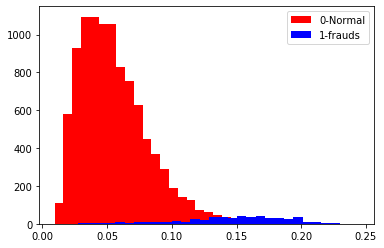

In [303]:
hist_1 = plt.hist(error_df[error_df['true_class']==0].reconstruction_error, bins=30, color='red')
hist_2 = plt.hist(error_df[error_df['true_class']==1].reconstruction_error, bins=30, color='blue')
plt.legend(['0-Normal', '1-frauds'], loc ='upper right')
plt.show

In [ ]:
"""
plt.plot(error_df[error_df['true_class']==1])
plt.plot(error_df[error_df['true_class']==0])

#plt.bar(range(len(num_list)), num_list)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'validataion'], loc='upper right');
plt.show()
"""

In [ ]:
plt.bar(range(0,2), error_df[error_df['true_class']==1].reconstruction_error)
plt.show

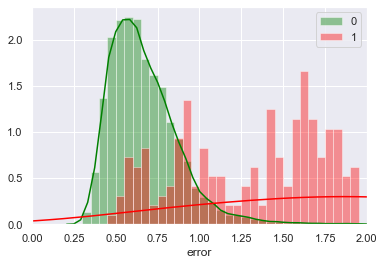

In [240]:
# Plot reconstruction error of test samples

# Add your code here

# Note you may get plots different from the below
# There is no unique solution to this problem

<function matplotlib.pyplot.show(*args, **kw)>

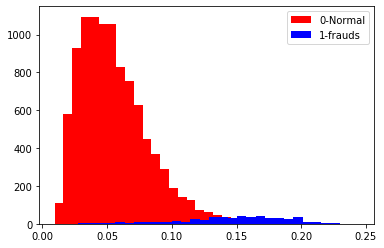

In [304]:
hist_1 = plt.hist(error_df[error_df['true_class']==0].reconstruction_error, bins=30, color='red')
hist_2 = plt.hist(error_df[error_df['true_class']==1].reconstruction_error, bins=30, color='blue')
plt.legend(['0-Normal', '1-frauds'], loc ='upper right')
plt.show

In [245]:
# Decide a threshold and calculate performance

# Add your code here

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10000
           1       0.81      0.81      0.81       492

    accuracy                           0.98     10492
   macro avg       0.90      0.90      0.90     10492
weighted avg       0.98      0.98      0.98     10492

auc score 0.958


In [314]:
y_test.values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [316]:
#from plot
#threshold》0.125



from sklearn.metrics import classification_report

#print(classification_report(y_true=y_test.values, y_pred=mse.values))

- According to Professor's demnstration, the threshold seems to be: threshold_error>1.25 it will be regard as fruad
- BUT, in my prototype, thereshold seems to be like threshold<0.27

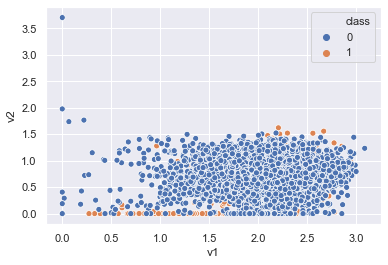

In [242]:
# Plot scatter plot for the latent variables

# Add your code here

In [319]:
bottleneck_model = Model(inputs=model_1.input, outputs=model_1.get_layer('dense_83').output)
print(bottleneck_model.summary())

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 29)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 14)                420       
_________________________________________________________________
dense_82 (Dense)             (None, 6)                 90        
_________________________________________________________________
dense_83 (Dense)             (None, 2)                 14        
Total params: 524
Trainable params: 524
Non-trainable params: 0
_________________________________________________________________
None


In [338]:
test = pd.read_csv('03_data/27_creditcard_test.csv')
test.head()
bottleneck_feature_0 = bottleneck_model.predict(test[test['Class']==0].drop(['Class'], axis=1))
bottleneck_feature_1 = bottleneck_model.predict(test[test['Class']==1].drop(['Class'], axis=1))

In [328]:
bottleneck_feature

array([[0.5744817 , 0.19990912],
       [0.2900698 , 0.6657661 ],
       [0.5774944 , 0.2563765 ],
       ...,
       [0.39093626, 0.56514746],
       [0.5886043 , 0.09884197],
       [0.38268512, 0.22131868]], dtype=float32)

In [325]:
bottleneck_feature[0,:]

array([0.478714  , 0.04639193], dtype=float32)

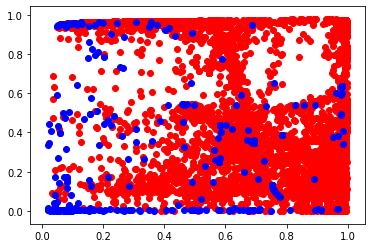

In [339]:
sca_0 = plt.scatter(bottleneck_feature_0[:,0], bottleneck_feature_0[:,1], color= 'red')
sca_1 = plt.scatter(bottleneck_feature_1[:,0], bottleneck_feature_1[:,1], color= 'blue')
plt.show()

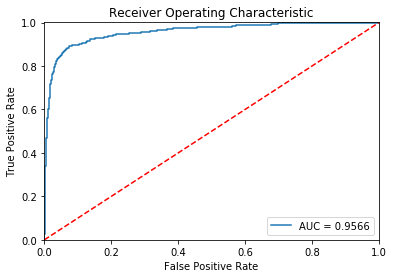

In [305]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Analysis:

- Describe how you choose the hyperparameters, e.g. dimension of each layer, activation function, loss function etc.
- Discuss whether you are able to differentiate samples from these two classes by reconstruction errors. What is the appropriate - threshold?
- From the scatter plot, do you think samples in both classes can be cleanly separated in the latent space?

1.We have a lot of hyperparameter we can adjust.
- regulization range. Professor ask us to adjust data into range [0,1] but our data is standard Gaussion result (outlier can't ignore). So if we extand the range into [-1,1] when we regulization, the final accuracy maybe improved due to wide data diversity.
- If we change our regulization into [-1,1], we should chagne at least input and output hidden layer into 'tanh' to fit this range. And we should change the class from [0,1] to [-1,1]
- After i check the data source, i know that v1-v28 actually have already PCA to hide original infomation. So it's not properate to use PCA again. In my code i choose QuantileTransformer(uniform) to fallten() as wide as possible. Frankly we also can intoroduce L2-norm to more take care about outliner value.
- If we want to get more precise data preprocess, we should preprocess data into two parts, one is v1-v28, another is Amount. Because these two parts have different data distribution and trait. And we should treat these process to test data simultanesouly when we use trained model to predict.
- For now, i only use three layer [14,7,2] to build encode and decode. Actually autocode have muliple way to built whole mode as long as encode part and decode part are symmetry
- Other activation fucntion or loss function are normal adjustment parameters.
   

2.For my result, it's not that significant to find out a threshold. From my current, we can barely to say that reconstruction_error>0.125 is the standard to detect frauds. But almost 40% frauds result are still have error less than 0.125. Maybe 80% fraud data distribute in a non-overlapping x-axis will be optimize threshold and result

3.For my iluustrate, it's not that easy. We still have plent of data scatter in the middle with normal data.

<br>

<br>

<br>

### Task 3:  Anomaly detection by VAE

**Requirements**
1. Create a VAE model and complete Requirements (1)-(5) as stated in Task 2 
2. Use scatter plots to show the latent `mean` and `variance` produced by the latent layer for each class of samples in the test dataset. Do you think the latent layer is able to differentiate samples in these two classes? Could you explain why the mean and variance are distributed in such ways?
2. Compare the results you obtained in both models and comment on pros and cons of each model, e.g. performance, stability, robustness etc.

In [162]:
# Define VAE model

# Add your code here

def normal_model(data, scaler):
    """
    MM = MinMaxScaler
    QT = QuantileTransformer
    """
    data = data
    scaler = scaler
    col_name = data.columns

    if scaler == 'MM':
        scaler = MinMaxScaler()
    elif scaler == 'QT':
        scaler = QuantileTransformer(output_distribution='uniform')
    elif scaler == 'SS':
        scaler = StandardScaler().reshap(-1,1)
    else:
        print("Plz choose regulizor")
    data_train = pd.DataFrame(scaler.fit_transform(data.values), columns=col_name)
    #data_train = scaler.fit_transform(data.values)
    
    return data_train



In [ ]:
# Compile and train VAE model

# Add your code here

In [ ]:
# Predict test samples and calculate reconstruction errors

# Add your code here

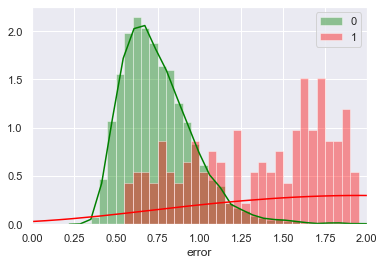

In [222]:
# Plot reconstruction errors

# Add your code here

In [225]:
# Determine a threshold and calculate performance

# Add your code here

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10000
           1       0.79      0.79      0.79       492

    accuracy                           0.98     10492
   macro avg       0.89      0.89      0.89     10492
weighted avg       0.98      0.98      0.98     10492

auc score 0.954


In [ ]:
# Extract latent mean and variance 

# Add your code here

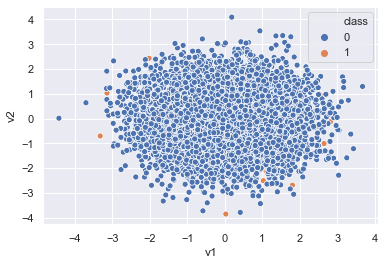

In [202]:
# plot latent mean

# Add your code here


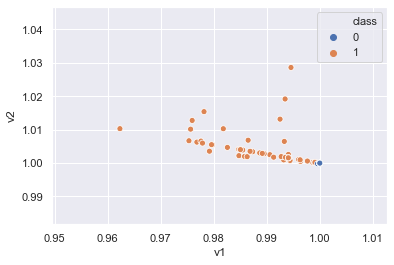

In [203]:
# plot latent variance

# Add your code here

In [41]:
from sklearn.linear_model import Ridge
import numpy as np

In [42]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

In [43]:
y

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [45]:
X

array([[ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215],
       [ 0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223],
       [ 0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117]])

In [46]:
clf = Ridge(alpha=1.0)
clf.fit(X)

TypeError: fit() missing 1 required positional argument: 'y'